**Seaborn usage**

Seaborn uses Matplotlib to draw the plots, but gives you higher‑level, prettier, and more statistical visualizations with much less code.

It also adds new plot types that Matplotlib doesn’t provide out of the box:
- pairplot
- jointplot
- catplot
- boxenplot
- kdeplot
- countplot
- lmplot (regression with confidence intervals)


Seaborn lacks compared to Matplotlib:
  - Pie Chart
  - Image display
  - errorbar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use a nice theme
sns.set_theme(style="whitegrid")

**Relationship between Matplotlib and Seaborn**

Seaborn always need Matplotlib to display charts.

Seaborn does not have its own rendering engine.
Every Seaborn plot is ultimately drawn by Matplotlib.
- Seaborn creates or uses a Matplotlib Figure
- Seaborn creates or uses a Matplotlib Axes
- Seaborn returns a Matplotlib Axes object
- Matplotlib handles the actual drawing
So Seaborn is essentially a high‑level API on top of Matplotlib.


1.) State‑based (Pyplot) API

In [ ]:
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)

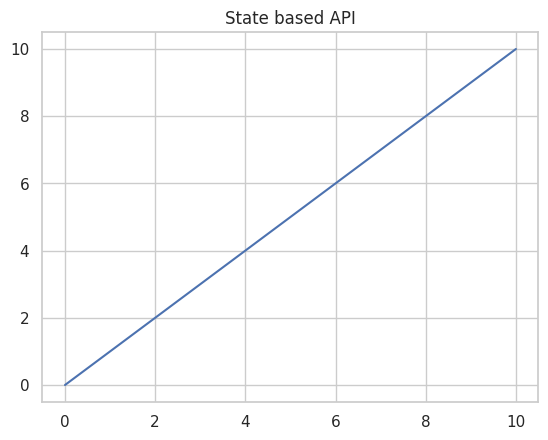

In [ ]:
sns.lineplot(x=x, y=y)
plt.title("State based API")   # Pyplot modifies the same Axes
plt.show()

2.)  Object‑Oriented (OO) API


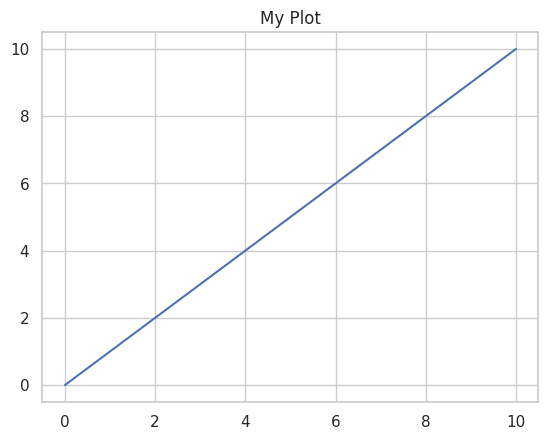

In [ ]:
fig, ax = plt.subplots()
# ax = ax parameter turns on this object oriented API
sns.lineplot(x=x, y=y, ax=ax)
ax.set_title("My Plot")
plt.show()

Seaborn follows this rule to choose where to draw:

- If you pass *ax=*, it draws on that Axes (OO mode).
- If you don’t, it uses the current Matplotlib Axes (Pyplot mode).


**Examples of various plots seaborn allows**

Explanation of what certain plots mean is in notebook:

tutorial_visualization_01_matplolib

In [6]:
# ----------------------------------------------------
# SAMPLE DATA
# ----------------------------------------------------
x = np.linspace(0, 10, 50)
y = np.sin(x)
y2 = np.cos(x)

categories = ["A", "B", "C", "D"]
values = [23, 45, 12, 30]

data = np.random.randn(500)
matrix = np.random.rand(10, 10)

df = pd.DataFrame({
    "x": x,
    "y": y,
    "y2": y2,
    "category": np.random.choice(categories, size=50),
    "value": np.random.randn(50)
})

**EXAMPLES OF VARIOUS PLOTS**



These are comparisons to plots in:

tutorial_visualization_01_matplolib.ipynb

**1.) LINE PLOT**

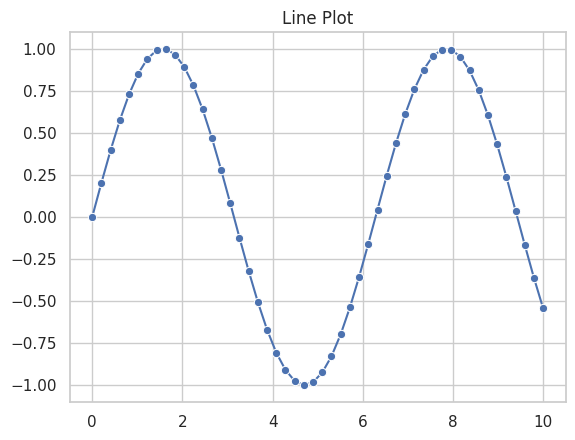

In [ ]:
plt.figure()
sns.lineplot(x=x, y=y, marker="o")
plt.title("Line Plot")
plt.show()

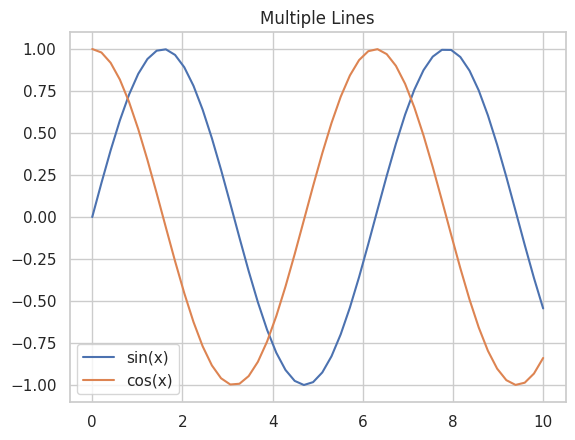

In [ ]:
plt.figure()
sns.lineplot(x=x, y=y, label="sin(x)")
sns.lineplot(x=x, y=y2, label="cos(x)")
plt.title("Multiple Lines")
plt.show()

**2.) SCATTER PLOT**

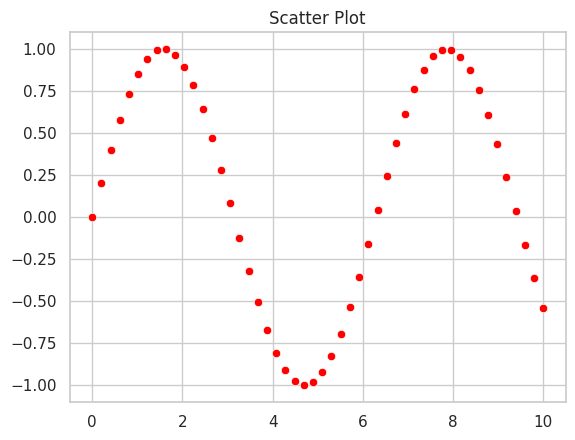

In [ ]:
plt.figure()
sns.scatterplot(x=x, y=y, color="red")
plt.title("Scatter Plot")
plt.show()

**3.) PLOT CHART**

Seabron lacks native pychart, still need to use Matplotlib.

**4.) BAR CHART**


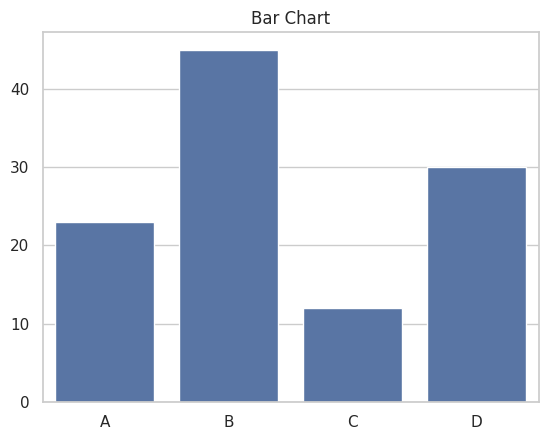

In [7]:
plt.figure()
sns.barplot(x=categories, y=values)
plt.title("Bar Chart")
plt.show()

To have same effect as matplotlib barh, simply swap the variables.

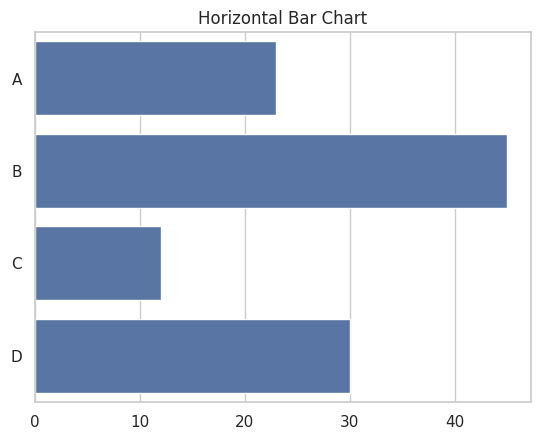

In [13]:
plt.figure()
sns.barplot(x=values, y=categories,)
plt.title("Horizontal Bar Chart")
plt.show()

**5. HISTOGRAM**

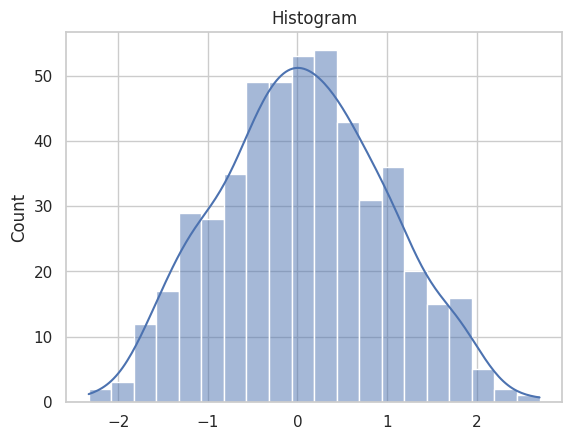

In [16]:
plt.figure()
sns.histplot(data, bins=20, kde=True)
plt.title("Histogram")
plt.show()

**6.) SUBPLOTS**

You still create subplots with Matplotlib, you use *ax* parameter to set which part of subplot will be used.

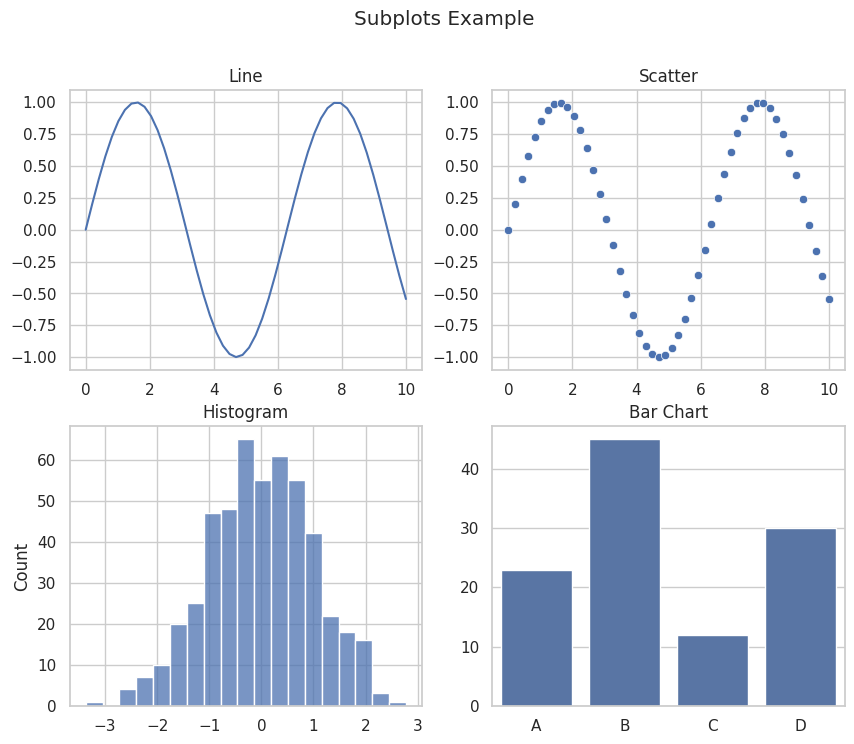

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.lineplot(x=x, y=y, ax=axs[0, 0])
axs[0, 0].set_title("Line")

sns.scatterplot(x=x, y=y, ax=axs[0, 1])
axs[0, 1].set_title("Scatter")

sns.histplot(data, ax=axs[1, 0])
axs[1, 0].set_title("Histogram")

sns.barplot(x=categories, y=values, ax=axs[1, 1])
axs[1, 1].set_title("Bar Chart")

fig.suptitle("Subplots Example")
plt.show()

**7.) IMAGE DISPLAY**

Matplotlib has no native image display functinalitites.

**8.) BOX PLOT**

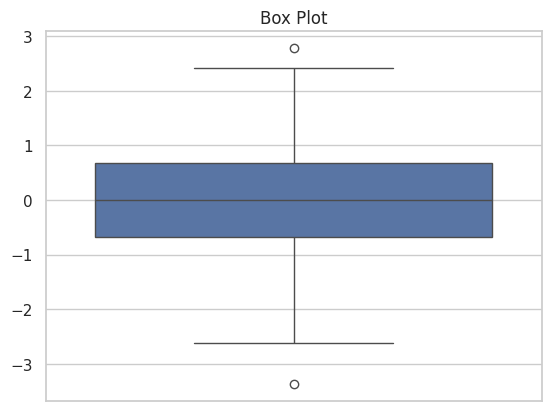

In [ ]:
plt.figure()
sns.boxplot(y=data)
plt.title("Box Plot")
plt.show()

**9.) VIOLIN PLOT**

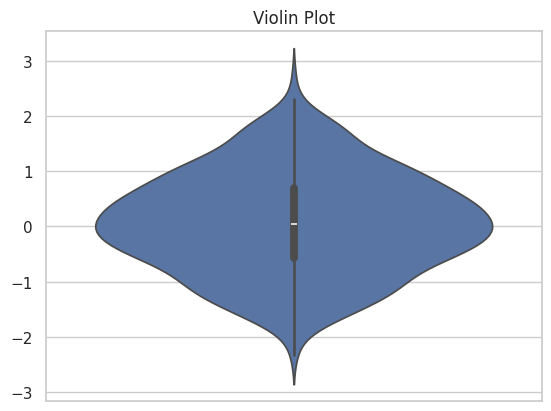

In [18]:
plt.figure()
sns.violinplot(y=data)
plt.title("Violin Plot")
plt.show()

**10.) HEATMAP**

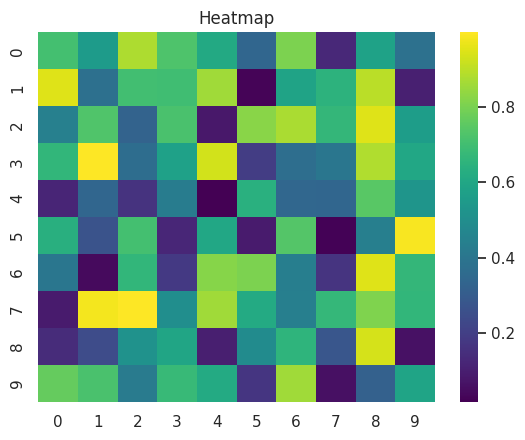

In [ ]:
plt.figure()
sns.heatmap(matrix, cmap="viridis", annot=False)
plt.title("Heatmap")
plt.show()

**11.) ERROR BARS**

There is no Seaborn equivalent to *errorbar* plot

**EXAMPLES OF SEABORN SPECIFIC PLOTS**


**1.) JOINT PLOT**

Plot that shows for 2 selected variables on a single image, relationship between them and their individual distributions.

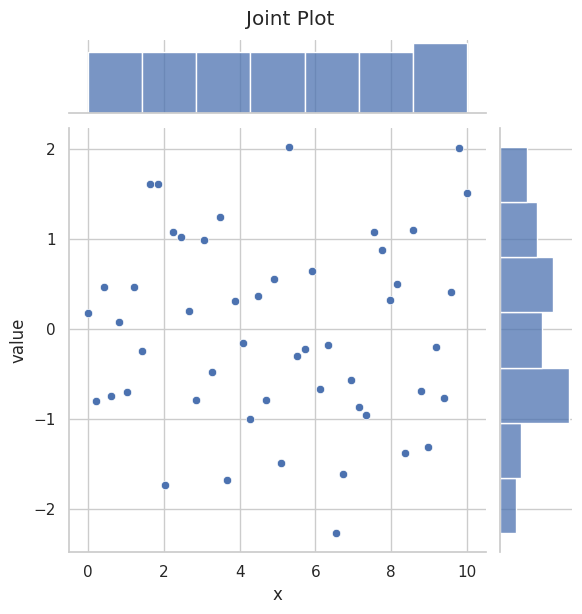

In [ ]:
sns.jointplot(data=df, x="x", y="value", kind="scatter")
plt.suptitle("Joint Plot", y=1.02)
plt.show()

**2.) PAIR PLOT**

Is like joint plot, but for multiple vairables.

Pair plot is designed to give you a fast,
compact summary of your dataset by showing two conceptually different things:

- On diagonals: The distribution of each variable.
- Off Diagonal: Relationship between two variables, how are they correlated.


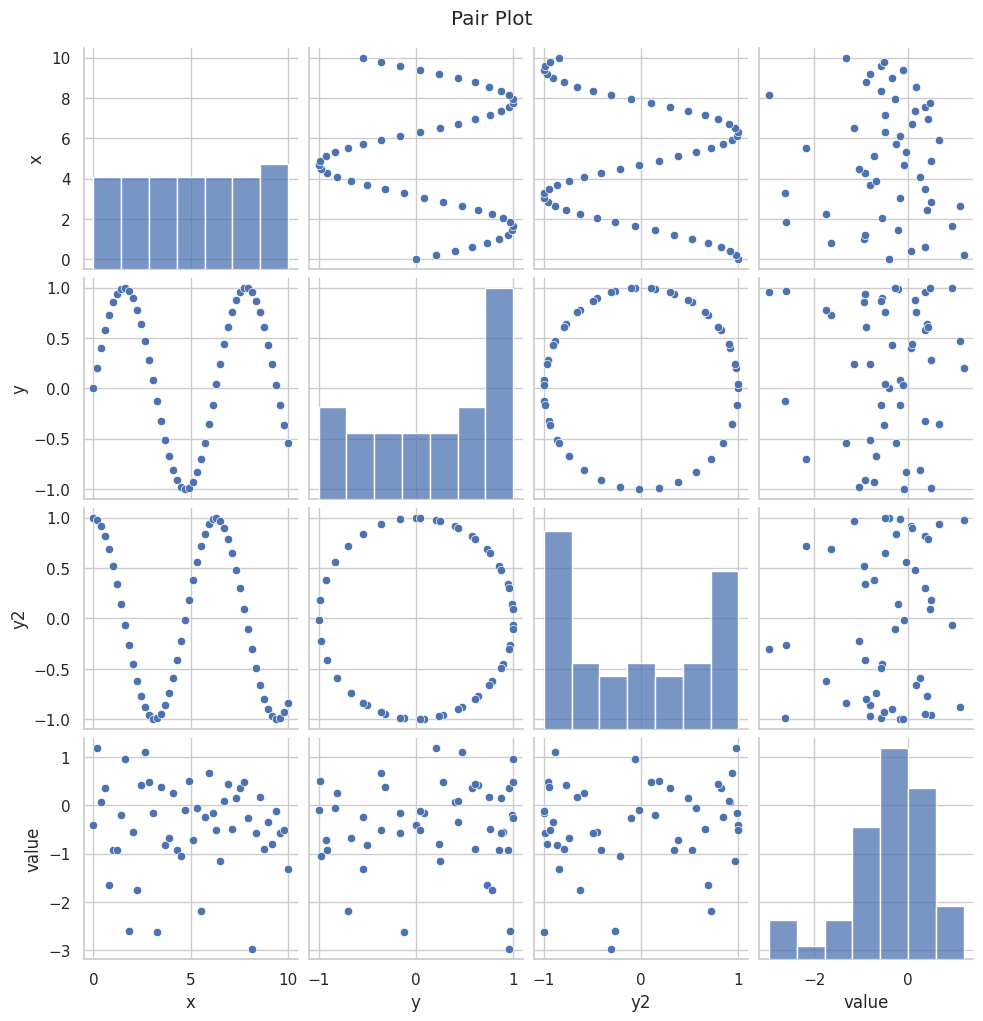

In [21]:
sns.pairplot(df[["x", "y", "y2", "value"]])
plt.suptitle("Pair Plot", y=1.02)
plt.show()

**3.) REGRESSION PLOT**

A regression plot plots data points with one variable on the x-axis and another on the y-axis, and then tries to find a relationship between them by calculating and drawing a regression line that best fits the points.

- Scatter points show actual data

- Regression line shows the predicted trend

Based on direction of this calculated  line, on of the following things can be observed.

- Upward-sloping line - > positive correlation, relationship where both increase together.
- Downward-sloping line -> negative correlation, relationship where one increases other decreases.
- Flat line -> no clear correlation.

Remember: correlation does not imply causation

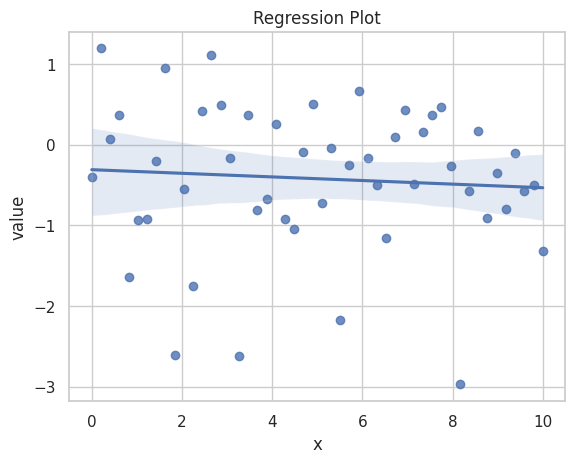

In [20]:

plt.figure()
sns.regplot(x="x", y="value", data=df)
plt.title("Regression Plot")
plt.show()

**4.) COUNT PLOT**

Shows frequency of categories in categorical distributions.

It is shown as a bar chart where:
- x-axis = categories
- y-axis = counts

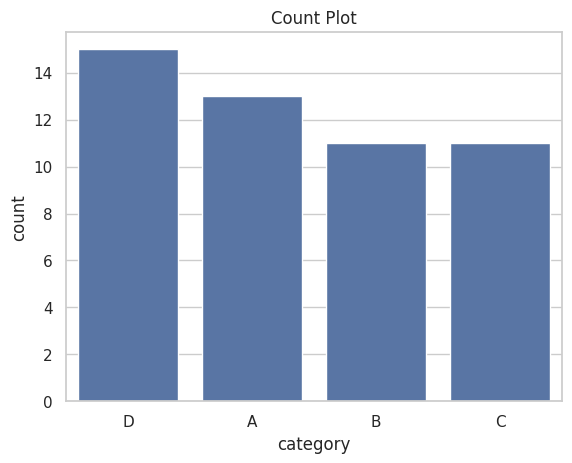

In [19]:
plt.figure()
sns.countplot(x=df["category"])
plt.title("Count Plot")
plt.show()